In [1]:
import tensorflow as tf
import tensorflow.keras as keras

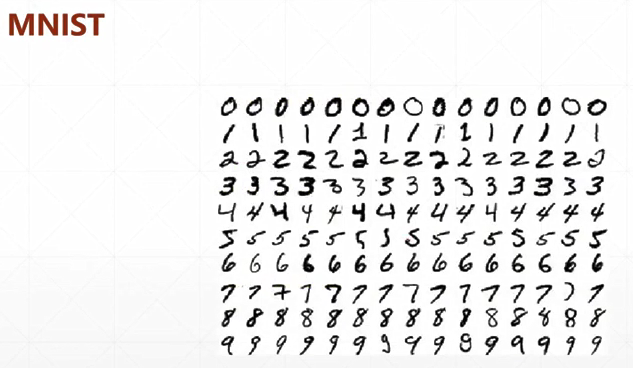

In [2]:
(x,y), (x_test,y_test) = keras.datasets.mnist.load_data()       #(x,y)是训练集数据，后面那个是测试集数据
x.shape,y.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [3]:
x.min(),x.max(),x.mean()

(0, 255, 33.318421449829934)

In [4]:
type(x)

numpy.ndarray

In [5]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [10]:
y[:4],y.min(),y.max()       #查看Labels数据情况

(array([5, 0, 4, 1], dtype=uint8), 0, 9)

In [6]:
y_onehot = tf.one_hot(y,depth=10)     #onehot编码，将数据结果转化为张量索引，方便对比
y_onehot[:2]

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### CIFAR10/100 将图片分为10大类/每个大类分为10小类

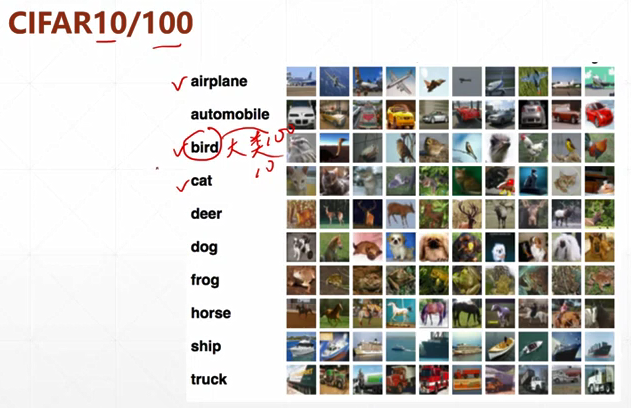

In [11]:
(x,y), (x_test,y_test) = keras.datasets.cifar10.load_data()       #cifar10数据集
#(x,y), (x_test,y_test) = keras.datasets.cifar100.load_data()       #cifar100数据集

170500096/170498071 [==============================] - 4s 0us/step


In [12]:
x.shape,y.shape,x_test.shape,y_test.shape   #彩色图片拥有rgb通道

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [13]:
x.min(),x.max()

(0, 255)

In [14]:
y[:4] 

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [15]:
db = tf.data.Dataset.from_tensor_slices(x_test)       #将数据转化为Dataset，方便后续操作

In [16]:
#转化为迭代器
next(iter(db))    #拿出一个数据，为张量

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124]

In [17]:
#将Dataset顺序打散
db = tf.data.Dataset.from_tensor_slices((x_test,y_test))
db = db.shuffle(10000)     #将图片顺序打散，参数给一个稍微大一点的就可以了

### map

In [18]:
def preprocess(x,y):
  x = tf.cast(x, dtype=tf.float32)/255.
  y = tf.cast(y,dtype=tf.int32)
  y = tf.one_hot(y,depth=10)
  return x,y

db2 = db.map(preprocess)     #对每个sample都进行数据预处理


In [25]:
#查看处理好的数据
res = next(iter(db2))
res[0].shape,res[1]

(TensorShape([32, 32, 3]),
 <tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>)

In [34]:
res[1][:2]   #为什么是这种切片方式？

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

### batch

In [22]:
db3 = db2.batch(32)
res = next(iter(db3))
res[0].shape,res[1].shape

(TensorShape([32, 32, 32, 3]), TensorShape([32, 1, 10]))

### repeat

In [ ]:
db4 = db3.repeat()   #永久迭代
db4 = db3.repeat(2)   #可以连续迭代两次

## For Example

In [ ]:
def prepare_mnist_features_and_labels(x,y):
  x = tf.cast(x,tf.float32)/255.
  y = tf.cast(y.tf.int64)
  return x,y

def mnist_dataset():
  (x,y), (x_val,y_val) = keras.datasets.fashion_mnist.load_data()
  y = tf.one_hot(y,depth=10)
  y_val = tf.one_hot(y_val,depth=10)

  ds = tf.data.Dataset.from_tensor_slices((x,y))
  #预处理
  ds = ds.map(prepare_mnist_features_and_labels)
  ds = ds.shuffle(60000).batch(100)

  ds_val = tf.data.Dataset.from_tensor_slices((x_val,y_val))
  ds_val = ds_val.map(prepare_mnist_features_and_labels)
  ds_val = ds_val.shuffle(10000).batch(100)
  
  return ds.ds_val


